<a href="https://colab.research.google.com/github/DevelopmentLife/MSAAI_Final_IoT_DataAnalytics/blob/main/MSAAI_IoT_Data_Cleaning_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
file_path = '/content/Metro_Interstate_Traffic_Volume.csv'
data = pd.read_csv(file_path)

# Convert date_time to datetime format for potential time series analysis
data['date_time'] = pd.to_datetime(data['date_time'])

# Handling outliers and erroneous values
# Replace 0 K temperatures with NaN, then fill with the mean of non-zero temperatures
data['temp'] = data['temp'].apply(lambda x: pd.NA if x == 0 else x)
mean_temp = data['temp'].mean(skipna=True)
data['temp'] = data['temp'].fillna(mean_temp)

# Cap rain values at the 99th percentile to remove extreme outliers
rain_99th_percentile = data['rain_1h'].quantile(0.99)
data['rain_1h'] = data['rain_1h'].clip(upper=rain_99th_percentile)

# Normalization using Min-Max Scaler
numerical_columns = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']
scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Save the cleaned and normalized data to a new CSV file
cleaned_file_path = '/content/cleaned_data_MSAAI_Final.csv'
data.to_csv(cleaned_file_path, index=False)

print("Cleaned data saved to:", cleaned_file_path)


Cleaned data saved to: /content/cleaned_data_MSAAI_Final.csv


               temp       rain_1h       snow_1h    clouds_all  traffic_volume
count  48204.000000  48204.000000  48204.000000  48204.000000    48204.000000
mean       0.568000      0.025792      0.000436      0.493622        0.447777
std        0.190586      0.128600      0.016015      0.390158        0.272920
min        0.000000      0.000000      0.000000      0.000000        0.000000
25%        0.431914      0.000000      0.000000      0.010000        0.163874
50%        0.585783      0.000000      0.000000      0.640000        0.464286
75%        0.726095      0.000000      0.000000      0.900000        0.677610
max        1.000000      1.000000      1.000000      1.000000        1.000000


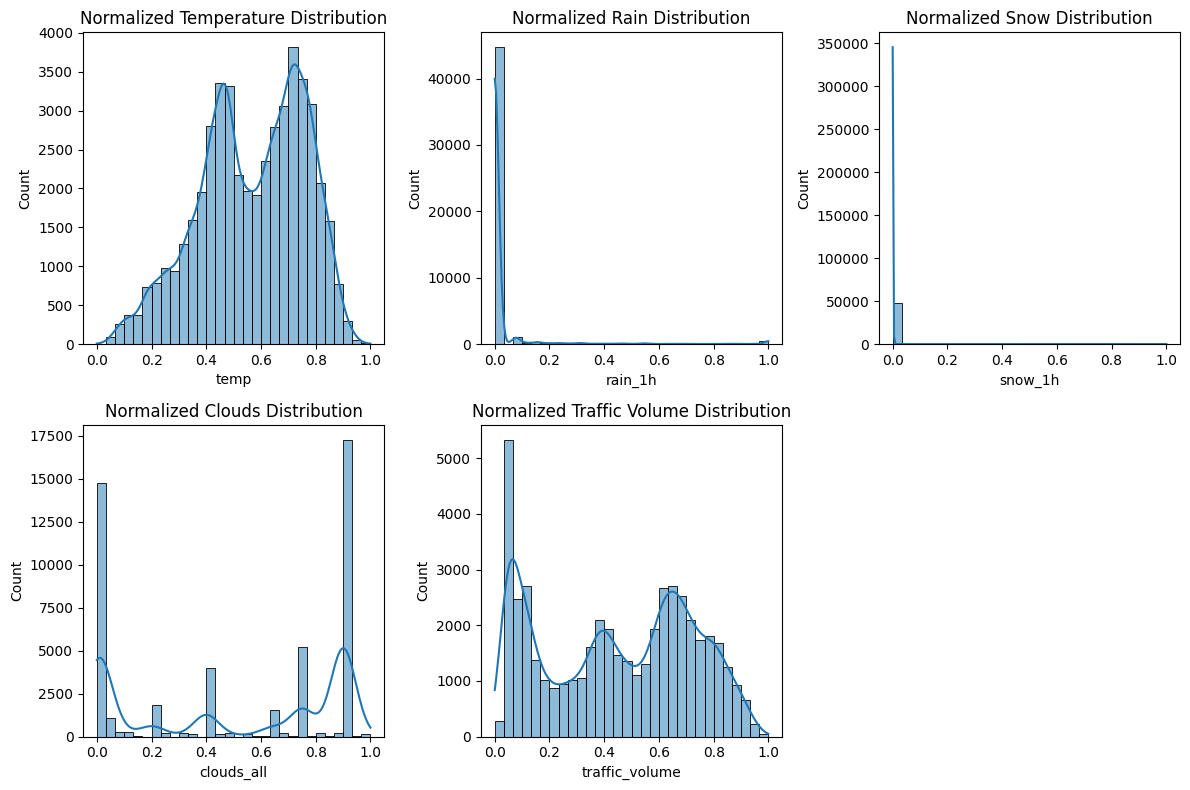

<ipython-input-8-77ebe60c0d38>:48: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


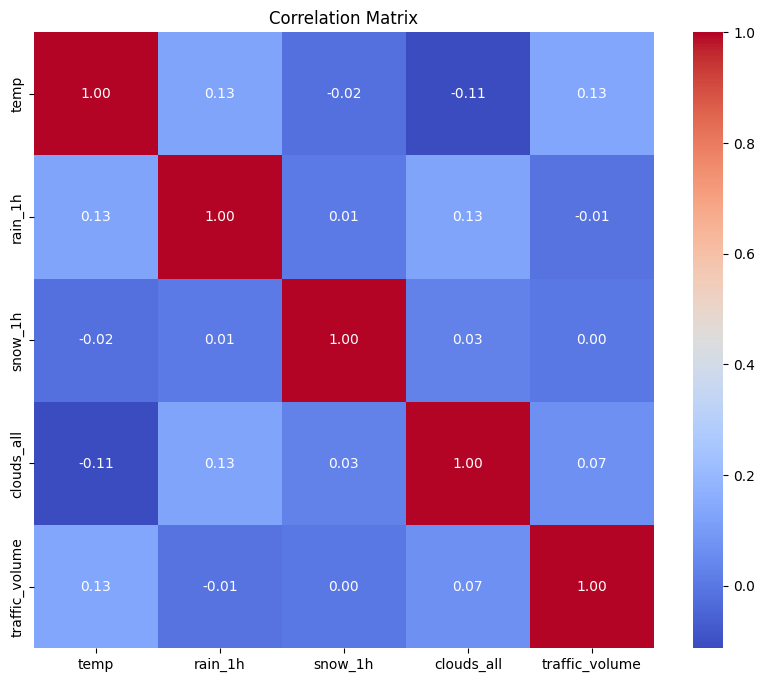

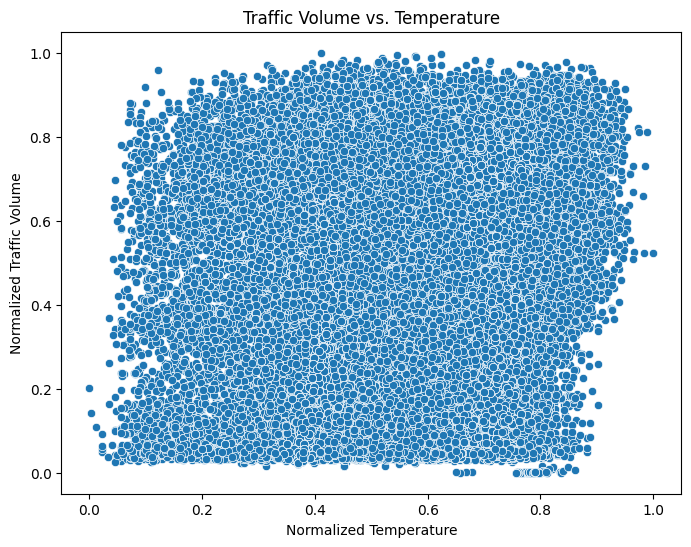

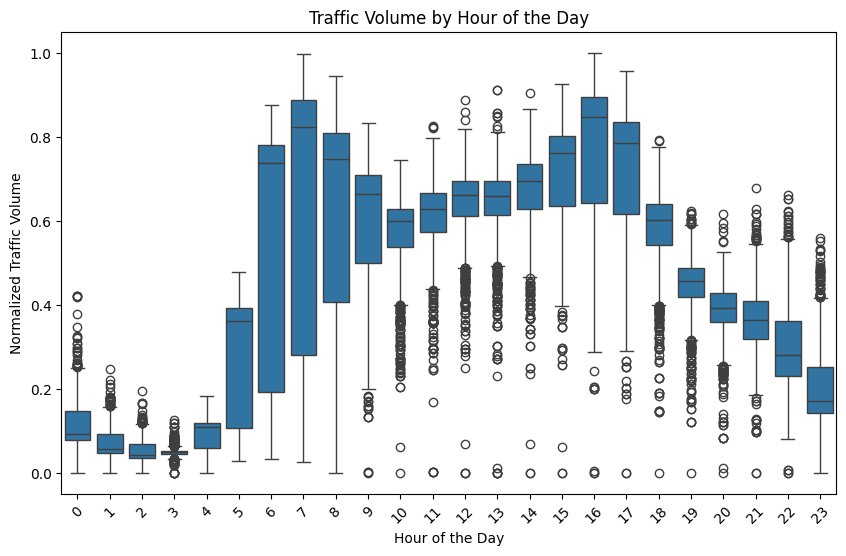

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned and normalized dataset
file_path = '/content/cleaned_data_MSAAI_Final.csv'  # Update with the correct path if needed
data = pd.read_csv(file_path)

# Convert 'date_time' back to datetime format if necessary
data['date_time'] = pd.to_datetime(data['date_time'])

# 1. Summary statistics
print(data.describe())

# 2. Visualizing distributions of variables
plt.figure(figsize=(12, 8))

# Temperature distribution
plt.subplot(2, 3, 1)
sns.histplot(data['temp'], bins=30, kde=True)
plt.title('Normalized Temperature Distribution')

# Rain distribution
plt.subplot(2, 3, 2)
sns.histplot(data['rain_1h'], bins=30, kde=True)
plt.title('Normalized Rain Distribution')

# Snow distribution
plt.subplot(2, 3, 3)
sns.histplot(data['snow_1h'], bins=30, kde=True)
plt.title('Normalized Snow Distribution')

# Clouds distribution
plt.subplot(2, 3, 4)
sns.histplot(data['clouds_all'], bins=30, kde=True)
plt.title('Normalized Clouds Distribution')

# Traffic Volume distribution
plt.subplot(2, 3, 5)
sns.histplot(data['traffic_volume'], bins=30, kde=True)
plt.title('Normalized Traffic Volume Distribution')

plt.tight_layout()
plt.show()

# 3. Examining relationships using scatter plots and correlation matrices
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Optional: Scatter plot example (Traffic Volume vs. Temperature)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['temp'], y=data['traffic_volume'])
plt.title('Traffic Volume vs. Temperature')
plt.xlabel('Normalized Temperature')
plt.ylabel('Normalized Traffic Volume')
plt.show()

# 4. Investigating temporal patterns (if needed, aggregate data by hour, day, month, etc.)
data['hour'] = data['date_time'].dt.hour
plt.figure(figsize=(10, 6))
sns.boxplot(x='hour', y='traffic_volume', data=data)
plt.title('Traffic Volume by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Normalized Traffic Volume')
plt.xticks(rotation=45)
plt.show()
